In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import flopy
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
config = {'font.family': 'Arial',
          'font.size': 12,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'mathtext.fontset': 'stix',
          'savefig.dpi': 300
         }
plt.rcParams.update(config)

# Read mf6pqc results pH Cl Mg Ca Calcite Dolomite
mf6pqc_data = np.load("./output/results.npy")
print(mf6pqc_data.shape)

# Read pht3d results [Ca Mg Cl pH Calcite Dolomite]
# pht3d_data = np.load("./input_data/PHT3D_results.npy")
# print(pht3d_data.shape)

(193, 12, 80)


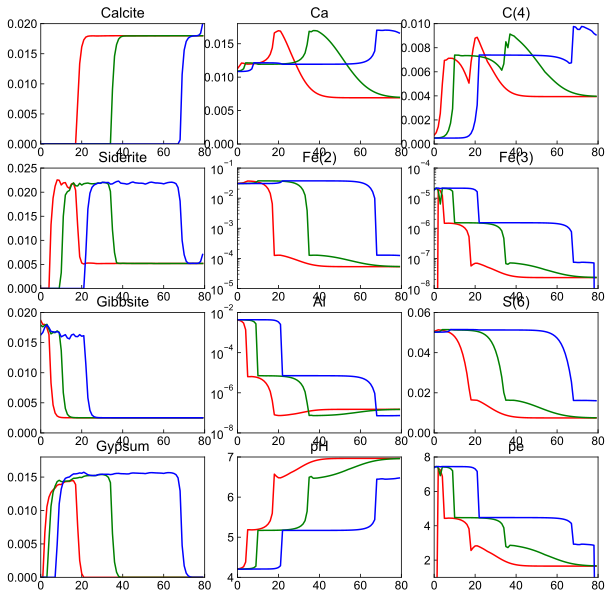

In [4]:
out_log_48 = mf6pqc_data[47].reshape(12, 80)
out_log_96 = mf6pqc_data[95].reshape(12, 80)
out_log_192 = mf6pqc_data[-1].reshape(12, 80)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(4, 3, 1)
ax.plot(out_log_48[2, :] / 0.35, c="red")
ax.plot(out_log_96[2, :] / 0.35, c="green")
ax.plot(out_log_192[2, :] / 0.35, c="blue")
ax.set_title("Calcite")
ax.set_ylim(0.0, 0.02)
ax.set_xlim(0, 80)

ax = fig.add_subplot(4, 3, 2)
ax.plot(out_log_48[3, :], c="red")
ax.plot(out_log_96[3, :], c="green")
ax.plot(out_log_192[3, :], c="blue")
ax.set_title("Ca")
ax.set_ylim(0.0, 0.018)
ax.set_xlim(0, 80)

ax = fig.add_subplot(4, 3, 3)
ax.plot(out_log_48[4, :], c="red")
ax.plot(out_log_96[4, :], c="green")
ax.plot(out_log_192[4, :], c="blue")
ax.set_title("C(4)")
ax.set_ylim(0.0, 0.010)
ax.set_xlim(0, 80)

ax = fig.add_subplot(4, 3, 4)
ax.plot(out_log_48[5, :]/ 0.35, c="red")
ax.plot(out_log_96[5, :]/ 0.35, c="green")
ax.plot(out_log_192[5, :]/ 0.35, c="blue")
ax.set_title("Siderite")
ax.set_ylim(0.0, 0.0250)
ax.set_xlim(0, 80)

ax = fig.add_subplot(4, 3, 5)
ax.plot(out_log_48[6, :], c="red")
ax.plot(out_log_96[6, :], c="green")
ax.plot(out_log_192[6, :], c="blue")
ax.set_title("Fe(2)")
ax.set_yscale('log')
ax.set_ylim(1e-5, 1e-1)
ax.set_xlim(0, 80)

ax = fig.add_subplot(4, 3, 6)
ax.plot(out_log_48[7, :], c="red")
ax.plot(out_log_96[7, :], c="green")
ax.plot(out_log_192[7, :], c="blue")
ax.set_title("Fe(3)")
ax.set_yscale('log')
ax.set_ylim(1e-8, 1e-4)
ax.set_xlim(0, 80)

ax = fig.add_subplot(4, 3, 7)
ax.plot(out_log_48[8, :]/ 0.35, c="red")
ax.plot(out_log_96[8, :]/ 0.35, c="green")
ax.plot(out_log_192[8, :]/ 0.35, c="blue")
ax.set_title("Gibbsite")
ax.set_ylim(0.0, 0.02)
ax.set_xlim(0, 80)

ax = fig.add_subplot(4, 3, 8)
ax.plot(out_log_48[9, :], c="red")
ax.plot(out_log_96[9, :], c="green")
ax.plot(out_log_192[9, :], c="blue")
ax.set_title("Al")  
ax.set_yscale('log')
ax.set_ylim(1e-8, 1e-2)
ax.set_xlim(0, 80)

ax = fig.add_subplot(4, 3, 9)
ax.plot(out_log_48[10, :], c="red")
ax.plot(out_log_96[10, :], c="green")
ax.plot(out_log_192[10, :], c="blue")
ax.set_title("S(6)")
ax.set_ylim(0.0, 0.06)
ax.set_xlim(0, 80)

ax = fig.add_subplot(4, 3, 10)
ax.plot(out_log_48[11, :]/ 0.35, c="red")
ax.plot(out_log_96[11, :]/ 0.35, c="green")
ax.plot(out_log_192[11, :]/ 0.35, c="blue")
ax.set_title("Gypsum")
ax.set_ylim(0.0, 0.018)
ax.set_xlim(0, 80)

ax = fig.add_subplot(4, 3, 11)
ax.plot(out_log_48[0, :], c="red")
ax.plot(out_log_96[0, :], c="green")
ax.plot(out_log_192[0, :], c="blue")
ax.set_title("pH")
ax.set_ylim(4.0, 7.0)
ax.set_xlim(0, 80)

ax = fig.add_subplot(4, 3, 12)
ax.plot(out_log_48[1, :], c="red")
ax.plot(out_log_96[1, :], c="green")
ax.plot(out_log_192[1, :], c="blue")
ax.set_title("pe")
ax.set_ylim(1.0, 8.0)
ax.set_xlim(0, 80)

plt.show()
